In [1]:
import scipy

from nilearn.datasets import fetch_neurovault_ids
import warnings

import numpy as np
from scipy import stats
from sklearn.decomposition import FastICA

from nilearn import datasets
from nilearn.image import smooth_img

from nilearn.datasets import load_mni152_brain_mask
from nilearn.input_data import NiftiMasker

from nilearn import plotting

from nilearn.datasets import fetch_neurovault
from nilearn.datasets.neurovault import basic_collection_terms, NotNull
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nv_data = fetch_neurovault_ids(collection_ids=(1952,))

images = nv_data['images']
images_meta = nv_data['images_meta']
collections = nv_data['collections_meta']

Reading local neurovault data.
Already fetched 1 image
Already fetched 2 images
Already fetched 3 images
Already fetched 4 images
Already fetched 5 images
Already fetched 6 images
Already fetched 7 images
Already fetched 8 images
Already fetched 9 images
Already fetched 10 images
Already fetched 11 images
Already fetched 12 images
Already fetched 13 images
Already fetched 14 images
Already fetched 15 images
Already fetched 16 images
Already fetched 17 images
Already fetched 18 images
Already fetched 19 images
Already fetched 20 images
Already fetched 21 images
Already fetched 22 images
Already fetched 23 images
Already fetched 24 images
Already fetched 25 images
Already fetched 26 images
Already fetched 27 images
Already fetched 28 images
Already fetched 29 images
Already fetched 30 images
Already fetched 31 images
Already fetched 32 images
Already fetched 33 images
Already fetched 34 images
Already fetched 35 images
Already fetched 36 images
Already fetched 37 images
Already fetched 3

Already fetched 314 images
Already fetched 315 images
Already fetched 316 images
Already fetched 317 images
Already fetched 318 images
Already fetched 319 images
Already fetched 320 images
Already fetched 321 images
Already fetched 322 images
Already fetched 323 images
Already fetched 324 images
Already fetched 325 images
Already fetched 326 images
Already fetched 327 images
Already fetched 328 images
Already fetched 329 images
Already fetched 330 images
Already fetched 331 images
Already fetched 332 images
Already fetched 333 images
Already fetched 334 images
Already fetched 335 images
Already fetched 336 images
Already fetched 337 images
Already fetched 338 images
Already fetched 339 images
Already fetched 340 images
Already fetched 341 images
Already fetched 342 images
Already fetched 343 images
Already fetched 344 images
Already fetched 345 images
Already fetched 346 images
Already fetched 347 images
Already fetched 348 images
Already fetched 349 images
Already fetched 350 images
A

Already fetched 623 images
Already fetched 624 images
Already fetched 625 images
Already fetched 626 images
Already fetched 627 images
Already fetched 628 images
Already fetched 629 images
Already fetched 630 images
Already fetched 631 images
Already fetched 632 images
Already fetched 633 images
Already fetched 634 images
Already fetched 635 images
Already fetched 636 images
Already fetched 637 images
Already fetched 638 images
Already fetched 639 images
Already fetched 640 images
Already fetched 641 images
Already fetched 642 images
Already fetched 643 images
Already fetched 644 images
Already fetched 645 images
Already fetched 646 images
Already fetched 647 images
Already fetched 648 images
Already fetched 649 images
Already fetched 650 images
Already fetched 651 images
Already fetched 652 images
Already fetched 653 images
Already fetched 654 images
Already fetched 655 images
Already fetched 656 images
Already fetched 657 images
Already fetched 658 images
Already fetched 659 images
A

Already fetched 934 images
Already fetched 935 images
Already fetched 936 images
Already fetched 937 images
Already fetched 938 images
Already fetched 939 images
Already fetched 940 images
Already fetched 941 images
Already fetched 942 images
Already fetched 943 images
Already fetched 944 images
Already fetched 945 images
Already fetched 946 images
Already fetched 947 images
Already fetched 948 images
Already fetched 949 images
Already fetched 950 images
Already fetched 951 images
Already fetched 952 images
Already fetched 953 images
Already fetched 954 images
Already fetched 955 images
Already fetched 956 images
Already fetched 957 images
Already fetched 958 images
Already fetched 959 images
Already fetched 960 images
Already fetched 961 images
Already fetched 962 images
Already fetched 963 images
Already fetched 964 images
Already fetched 965 images
Already fetched 966 images
Already fetched 967 images
Already fetched 968 images
Already fetched 969 images
Already fetched 970 images
A

Already fetched 1239 images
Already fetched 1240 images
Already fetched 1241 images
Already fetched 1242 images
Already fetched 1243 images
Already fetched 1244 images
Already fetched 1245 images
Already fetched 1246 images
Already fetched 1247 images
Already fetched 1248 images
Already fetched 1249 images
Already fetched 1250 images
Already fetched 1251 images
Already fetched 1252 images
Already fetched 1253 images
Already fetched 1254 images
Already fetched 1255 images
Already fetched 1256 images
Already fetched 1257 images
Already fetched 1258 images
Already fetched 1259 images
Already fetched 1260 images
Already fetched 1261 images
Already fetched 1262 images
Already fetched 1263 images
Already fetched 1264 images
Already fetched 1265 images
Already fetched 1266 images
Already fetched 1267 images
Already fetched 1268 images
Already fetched 1269 images
Already fetched 1270 images
Already fetched 1271 images
Already fetched 1272 images
Already fetched 1273 images
Already fetched 1274

Already fetched 1542 images
Already fetched 1543 images
Already fetched 1544 images
Already fetched 1545 images
Already fetched 1546 images
Already fetched 1547 images
Already fetched 1548 images
Already fetched 1549 images
Already fetched 1550 images
Already fetched 1551 images
Already fetched 1552 images
Already fetched 1553 images
Already fetched 1554 images
Already fetched 1555 images
Already fetched 1556 images
Already fetched 1557 images
Already fetched 1558 images
Already fetched 1559 images
Already fetched 1560 images
Already fetched 1561 images
Already fetched 1562 images
Already fetched 1563 images
Already fetched 1564 images
Already fetched 1565 images
Already fetched 1566 images
Already fetched 1567 images
Already fetched 1568 images
Already fetched 1569 images
Already fetched 1570 images
Already fetched 1571 images
Already fetched 1572 images
Already fetched 1573 images
Already fetched 1574 images
Already fetched 1575 images
Already fetched 1576 images
Already fetched 1577

Already fetched 1841 images
Already fetched 1842 images
Already fetched 1843 images
Already fetched 1844 images
Already fetched 1845 images
Already fetched 1846 images
Already fetched 1847 images
Already fetched 1848 images
Already fetched 1849 images
Already fetched 1850 images
Already fetched 1851 images
Already fetched 1852 images
Already fetched 1853 images
Already fetched 1854 images
Already fetched 1855 images
Already fetched 1856 images
Already fetched 1857 images
Already fetched 1858 images
Already fetched 1859 images
Already fetched 1860 images
Already fetched 1861 images
Already fetched 1862 images
Already fetched 1863 images
Already fetched 1864 images
Already fetched 1865 images
Already fetched 1866 images
Already fetched 1867 images
Already fetched 1868 images
Already fetched 1869 images
Already fetched 1870 images
Already fetched 1871 images
Already fetched 1872 images
Already fetched 1873 images
Already fetched 1874 images
Already fetched 1875 images
Already fetched 1876

Already fetched 2136 images
Already fetched 2137 images
Already fetched 2138 images
Already fetched 2139 images
Already fetched 2140 images
Already fetched 2141 images
Already fetched 2142 images
Already fetched 2143 images
Already fetched 2144 images
Already fetched 2145 images
Already fetched 2146 images
Already fetched 2147 images
Already fetched 2148 images
Already fetched 2149 images
Already fetched 2150 images
Already fetched 2151 images
Already fetched 2152 images
Already fetched 2153 images
Already fetched 2154 images
Already fetched 2155 images
Already fetched 2156 images
Already fetched 2157 images
Already fetched 2158 images
Already fetched 2159 images
Already fetched 2160 images
Already fetched 2161 images
Already fetched 2162 images
Already fetched 2163 images
Already fetched 2164 images
Already fetched 2165 images
Already fetched 2166 images
Already fetched 2167 images
Already fetched 2168 images
Already fetched 2169 images
Already fetched 2170 images
Already fetched 2171

Already fetched 2430 images
Already fetched 2431 images
Already fetched 2432 images
Already fetched 2433 images
Already fetched 2434 images
Already fetched 2435 images
Already fetched 2436 images
Already fetched 2437 images
Already fetched 2438 images
Already fetched 2439 images
Already fetched 2440 images
Already fetched 2441 images
Already fetched 2442 images
Already fetched 2443 images
Already fetched 2444 images
Already fetched 2445 images
Already fetched 2446 images
Already fetched 2447 images
Already fetched 2448 images
Already fetched 2449 images
Already fetched 2450 images
Already fetched 2451 images
Already fetched 2452 images
Already fetched 2453 images
Already fetched 2454 images
Already fetched 2455 images
Already fetched 2456 images
Already fetched 2457 images
Already fetched 2458 images
Already fetched 2459 images
Already fetched 2460 images
Already fetched 2461 images
Already fetched 2462 images
Already fetched 2463 images
Already fetched 2464 images
Already fetched 2465

Already fetched 2728 images
Already fetched 2729 images
Already fetched 2730 images
Already fetched 2731 images
Already fetched 2732 images
Already fetched 2733 images
Already fetched 2734 images
Already fetched 2735 images
Already fetched 2736 images
Already fetched 2737 images
Already fetched 2738 images
Already fetched 2739 images
Already fetched 2740 images
Already fetched 2741 images
Already fetched 2742 images
Already fetched 2743 images
Already fetched 2744 images
Already fetched 2745 images
Already fetched 2746 images
Already fetched 2747 images
Already fetched 2748 images
Already fetched 2749 images
Already fetched 2750 images
Already fetched 2751 images
Already fetched 2752 images
Already fetched 2753 images
Already fetched 2754 images
Already fetched 2755 images
Already fetched 2756 images
Already fetched 2757 images
Already fetched 2758 images
Already fetched 2759 images
Already fetched 2760 images
Already fetched 2761 images
Already fetched 2762 images
Already fetched 2763

Already fetched 3031 images
Already fetched 3032 images
Already fetched 3033 images
Already fetched 3034 images
Already fetched 3035 images
Already fetched 3036 images
Already fetched 3037 images
Already fetched 3038 images
Already fetched 3039 images
Already fetched 3040 images
Already fetched 3041 images
Already fetched 3042 images
Already fetched 3043 images
Already fetched 3044 images
Already fetched 3045 images
Already fetched 3046 images
Already fetched 3047 images
Already fetched 3048 images
Already fetched 3049 images
Already fetched 3050 images
Already fetched 3051 images
Already fetched 3052 images
Already fetched 3053 images
Already fetched 3054 images
Already fetched 3055 images
Already fetched 3056 images
Already fetched 3057 images
Already fetched 3058 images
Already fetched 3059 images
Already fetched 3060 images
Already fetched 3061 images
Already fetched 3062 images
Already fetched 3063 images
Already fetched 3064 images
Already fetched 3065 images
Already fetched 3066

Already fetched 3330 images
Already fetched 3331 images
Already fetched 3332 images
Already fetched 3333 images
Already fetched 3334 images
Already fetched 3335 images
Already fetched 3336 images
Already fetched 3337 images
Already fetched 3338 images
Already fetched 3339 images
Already fetched 3340 images
Already fetched 3341 images
Already fetched 3342 images
Already fetched 3343 images
Already fetched 3344 images
Already fetched 3345 images
Already fetched 3346 images
Already fetched 3347 images
Already fetched 3348 images
Already fetched 3349 images
Already fetched 3350 images
Already fetched 3351 images
Already fetched 3352 images
Already fetched 3353 images
Already fetched 3354 images
Already fetched 3355 images
Already fetched 3356 images
Already fetched 3357 images
Already fetched 3358 images
Already fetched 3359 images
Already fetched 3360 images
Already fetched 3361 images
Already fetched 3362 images
Already fetched 3363 images
Already fetched 3364 images
Already fetched 3365

Already fetched 3632 images
Already fetched 3633 images
Already fetched 3634 images
Already fetched 3635 images
Already fetched 3636 images
Already fetched 3637 images
Already fetched 3638 images
Already fetched 3639 images
Already fetched 3640 images
Already fetched 3641 images
Already fetched 3642 images
Already fetched 3643 images
Already fetched 3644 images
Already fetched 3645 images
Already fetched 3646 images
Already fetched 3647 images
Already fetched 3648 images
Already fetched 3649 images
Already fetched 3650 images
Already fetched 3651 images
Already fetched 3652 images
Already fetched 3653 images
Already fetched 3654 images
Already fetched 3655 images
Already fetched 3656 images
Already fetched 3657 images
Already fetched 3658 images
Already fetched 3659 images
Already fetched 3660 images
Already fetched 3661 images
Already fetched 3662 images
Already fetched 3663 images
Already fetched 3664 images
Already fetched 3665 images
Already fetched 3666 images
Already fetched 3667

Already fetched 3935 images
Already fetched 3936 images
Already fetched 3937 images
Already fetched 3938 images
Already fetched 3939 images
Already fetched 3940 images
Already fetched 3941 images
Already fetched 3942 images
Already fetched 3943 images
Already fetched 3944 images
Already fetched 3945 images
Already fetched 3946 images
Already fetched 3947 images
Already fetched 3948 images
Already fetched 3949 images
Already fetched 3950 images
Already fetched 3951 images
Already fetched 3952 images
Already fetched 3953 images
Already fetched 3954 images
Already fetched 3955 images
Already fetched 3956 images
Already fetched 3957 images
Already fetched 3958 images
Already fetched 3959 images
Already fetched 3960 images
Already fetched 3961 images
Already fetched 3962 images
Already fetched 3963 images
Already fetched 3964 images
Already fetched 3965 images
Already fetched 3966 images
Already fetched 3967 images
Already fetched 3968 images
Already fetched 3969 images
Already fetched 3970

Already fetched 4234 images
Already fetched 4235 images
Already fetched 4236 images
Already fetched 4237 images
Already fetched 4238 images
Already fetched 4239 images
Already fetched 4240 images
Already fetched 4241 images
Already fetched 4242 images
Already fetched 4243 images
Already fetched 4244 images
Already fetched 4245 images
Already fetched 4246 images
Already fetched 4247 images
Already fetched 4248 images
Already fetched 4249 images
Already fetched 4250 images
Already fetched 4251 images
Already fetched 4252 images
Already fetched 4253 images
Already fetched 4254 images
Already fetched 4255 images
Already fetched 4256 images
Already fetched 4257 images
Already fetched 4258 images
Already fetched 4259 images
Already fetched 4260 images
Already fetched 4261 images
Already fetched 4262 images
Already fetched 4263 images
Already fetched 4264 images
Already fetched 4265 images
Already fetched 4266 images
Already fetched 4267 images
Already fetched 4268 images
Already fetched 4269

Already fetched 4528 images
Already fetched 4529 images
Already fetched 4530 images
Already fetched 4531 images
Already fetched 4532 images
Already fetched 4533 images
Already fetched 4534 images
Already fetched 4535 images
Already fetched 4536 images
Already fetched 4537 images
Already fetched 4538 images
Already fetched 4539 images
Already fetched 4540 images
Already fetched 4541 images
Already fetched 4542 images
Already fetched 4543 images
Already fetched 4544 images
Already fetched 4545 images
Already fetched 4546 images
Already fetched 4547 images
Already fetched 4548 images
Already fetched 4549 images
Already fetched 4550 images
Already fetched 4551 images
Already fetched 4552 images
Already fetched 4553 images
Already fetched 4554 images
Already fetched 4555 images
Already fetched 4556 images
Already fetched 4557 images
Already fetched 4558 images
Already fetched 4559 images
Already fetched 4560 images
Already fetched 4561 images
Already fetched 4562 images
Already fetched 4563

Already fetched 4822 images
Already fetched 4823 images
Already fetched 4824 images
Already fetched 4825 images
Already fetched 4826 images
Already fetched 4827 images
Already fetched 4828 images
Already fetched 4829 images
Already fetched 4830 images
Already fetched 4831 images
Already fetched 4832 images
Already fetched 4833 images
Already fetched 4834 images
Already fetched 4835 images
Already fetched 4836 images
Already fetched 4837 images
Already fetched 4838 images
Already fetched 4839 images
Already fetched 4840 images
Already fetched 4841 images
Already fetched 4842 images
Already fetched 4843 images
Already fetched 4844 images
Already fetched 4845 images
Already fetched 4846 images
Already fetched 4847 images
Already fetched 4848 images
Already fetched 4849 images
Already fetched 4850 images
Already fetched 4851 images
Already fetched 4852 images
Already fetched 4853 images
Already fetched 4854 images
Already fetched 4855 images
Already fetched 4856 images
Already fetched 4857

Already fetched 5120 images
Already fetched 5121 images
Already fetched 5122 images
Already fetched 5123 images
Already fetched 5124 images
Already fetched 5125 images
Already fetched 5126 images
Already fetched 5127 images
Already fetched 5128 images
Already fetched 5129 images
Already fetched 5130 images
Already fetched 5131 images
Already fetched 5132 images
Already fetched 5133 images
Already fetched 5134 images
Already fetched 5135 images
Already fetched 5136 images
Already fetched 5137 images
Already fetched 5138 images
Already fetched 5139 images
Already fetched 5140 images
Already fetched 5141 images
Already fetched 5142 images
Already fetched 5143 images
Already fetched 5144 images
Already fetched 5145 images
Already fetched 5146 images
Already fetched 5147 images
Already fetched 5148 images
Already fetched 5149 images
Already fetched 5150 images
Already fetched 5151 images
Already fetched 5152 images
Already fetched 5153 images
Already fetched 5154 images
Already fetched 5155

Already fetched 5422 images
Already fetched 5423 images
Already fetched 5424 images
Already fetched 5425 images
Already fetched 5426 images
Already fetched 5427 images
Already fetched 5428 images
Already fetched 5429 images
Already fetched 5430 images
Already fetched 5431 images
Already fetched 5432 images
Already fetched 5433 images
Already fetched 5434 images
Already fetched 5435 images
Already fetched 5436 images
Already fetched 5437 images
Already fetched 5438 images
Already fetched 5439 images
Already fetched 5440 images
Already fetched 5441 images
Already fetched 5442 images
Already fetched 5443 images
Already fetched 5444 images
Already fetched 5445 images
Already fetched 5446 images
Already fetched 5447 images
Already fetched 5448 images
Already fetched 5449 images
Already fetched 5450 images
Already fetched 5451 images
Already fetched 5452 images
Already fetched 5453 images
Already fetched 5454 images
Already fetched 5455 images
Already fetched 5456 images
Already fetched 5457

Already fetched 5723 images
Already fetched 5724 images
Already fetched 5725 images
Already fetched 5726 images
Already fetched 5727 images
Already fetched 5728 images
Already fetched 5729 images
Already fetched 5730 images
Already fetched 5731 images
Already fetched 5732 images
Already fetched 5733 images
Already fetched 5734 images
Already fetched 5735 images
Already fetched 5736 images
Already fetched 5737 images
Already fetched 5738 images
Already fetched 5739 images
Already fetched 5740 images
Already fetched 5741 images
Already fetched 5742 images
Already fetched 5743 images
Already fetched 5744 images
Already fetched 5745 images
Already fetched 5746 images
Already fetched 5747 images
Already fetched 5748 images
Already fetched 5749 images
Already fetched 5750 images
Already fetched 5751 images
Already fetched 5752 images
Already fetched 5753 images
Already fetched 5754 images
Already fetched 5755 images
Already fetched 5756 images
Already fetched 5757 images
Already fetched 5758

Already fetched 6016 images
Already fetched 6017 images
Already fetched 6018 images
Already fetched 6019 images
Already fetched 6020 images
Already fetched 6021 images
Already fetched 6022 images
Already fetched 6023 images
Already fetched 6024 images
Already fetched 6025 images
Already fetched 6026 images
Already fetched 6027 images
Already fetched 6028 images
Already fetched 6029 images
Already fetched 6030 images
Already fetched 6031 images
Already fetched 6032 images
Already fetched 6033 images
Already fetched 6034 images
Already fetched 6035 images
Already fetched 6036 images
Already fetched 6037 images
Already fetched 6038 images
Already fetched 6039 images
Already fetched 6040 images
Already fetched 6041 images
Already fetched 6042 images
Already fetched 6043 images
Already fetched 6044 images
Already fetched 6045 images
Already fetched 6046 images
Already fetched 6047 images
Already fetched 6048 images
Already fetched 6049 images
Already fetched 6050 images
Already fetched 6051

Already fetched 6316 images
Already fetched 6317 images
Already fetched 6318 images
Already fetched 6319 images
Already fetched 6320 images
Already fetched 6321 images
Already fetched 6322 images
Already fetched 6323 images
Already fetched 6324 images
Already fetched 6325 images
Already fetched 6326 images
Already fetched 6327 images
Already fetched 6328 images
Already fetched 6329 images
Already fetched 6330 images
Already fetched 6331 images
Already fetched 6332 images
Already fetched 6333 images
Already fetched 6334 images
Already fetched 6335 images
Already fetched 6336 images
Already fetched 6337 images
Already fetched 6338 images
Already fetched 6339 images
Already fetched 6340 images
Already fetched 6341 images
Already fetched 6342 images
Already fetched 6343 images
Already fetched 6344 images
Already fetched 6345 images
Already fetched 6346 images
Already fetched 6347 images
Already fetched 6348 images
Already fetched 6349 images
Already fetched 6350 images
Already fetched 6351

In [3]:
print("\nReshaping and masking images.\n")
from nilearn.masking import compute_background_mask

mask = compute_background_mask(images)
masker = NiftiMasker(mask_img=mask).fit()
X = masker.transform(images)


Reshaping and masking images.



/home/ssouravsingh12/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


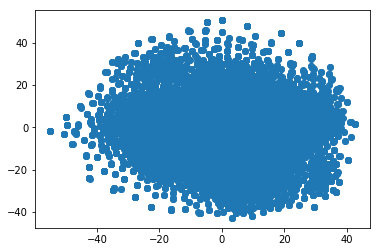

In [4]:
from MulticoreTSNE import MulticoreTSNE as TSNE

embeddings = TSNE(n_jobs=-1).fit_transform(X)

plt.scatter(embeddings[:,0], embeddings[:,1])

In [10]:
from sklearn.manifold import MDS

embedding = MDS(n_jobs=-1, random_state=42).fit_transform(X)

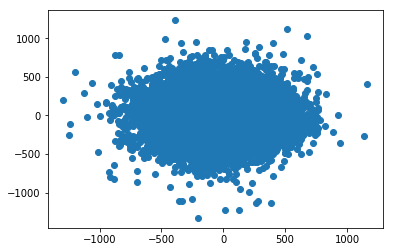

In [11]:
plt.scatter(embedding[:,0], embedding[:,1])